In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

### Using Vader

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#### Importing dataset

In [3]:
df = pd.read_csv(r"IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
df.shape

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

In [9]:
# Check value counts
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [10]:
# Optional: Check percentage
print(df['sentiment'].value_counts(normalize=True) * 100)

sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


* The dataset is balanced

######  Text Preprocessing

In [11]:
import re

def clean_text(text):
    #text = text.lower()                             # Lowercase
    text = re.sub(r"http\S+|www\S+", "", text)      # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)         # Remove non-letter characters
    text = re.sub(r"\s+", " ", text).strip()        # Remove extra spaces
    return text

In [12]:
df['cleaned'] = df['review'].apply(clean_text)
df['scores'] = df['cleaned'].apply(lambda x: analyzer.polarity_scores(x))

In [13]:
# Apply VADER sentiment analysis
df['scores'] = df['review'].apply(lambda x: analyzer.polarity_scores(x))
df['compound'] = df['scores'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound'].apply(
    lambda c: 'Positive' if c >= 0.05 else 'Negative' if c <= -0.05 else 'Neutral'
)

print(df[['review', 'compound', 'sentiment']])

                                                  review  compound sentiment
0      One of the other reviewers has mentioned that ...   -0.9916  Negative
1      A wonderful little production. <br /><br />The...    0.9670  Positive
2      I thought this was a wonderful way to spend ti...    0.9519  Positive
3      Basically there's a family where a little boy ...   -0.9213  Negative
4      Petter Mattei's "Love in the Time of Money" is...    0.9744  Positive
...                                                  ...       ...       ...
49995  I thought this movie did a down right good job...    0.9886  Positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...   -0.6837  Negative
49997  I am a Catholic taught in parochial elementary...   -0.9734  Negative
49998  I'm going to have to disagree with the previou...   -0.8657  Negative
49999  No one expects the Star Trek movies to be high...    0.6975  Positive

[50000 rows x 3 columns]


In [14]:
# Count of each sentiment
print(df['sentiment'].value_counts())

sentiment
Positive    33086
Negative    16569
Neutral       345
Name: count, dtype: int64


In [15]:
#Viewing as percentages
print(df['sentiment'].value_counts(normalize=True) * 100)

sentiment
Positive    66.172
Negative    33.138
Neutral      0.690
Name: proportion, dtype: float64


##### Visual Analysis

###### Sentiment Count

C:\Users\NIIT Enugu\AppData\Local\Temp\ipykernel_7932\1911406768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


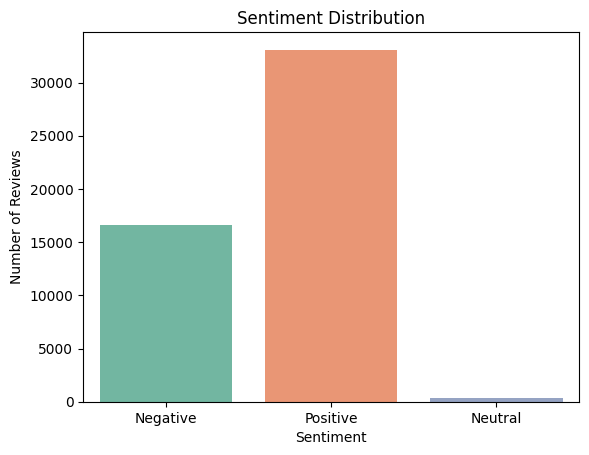

In [16]:
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


###### Distribution of Compound Scores

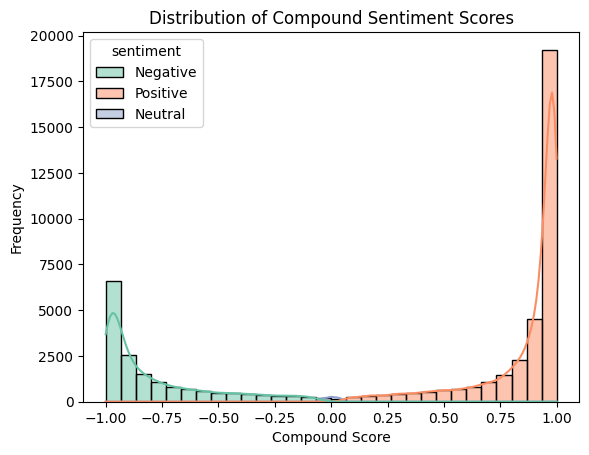

In [17]:
sns.histplot(data=df, x='compound', hue='sentiment', kde=True, palette='Set2', bins=30)
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

###### Word Cloud per Sentiment

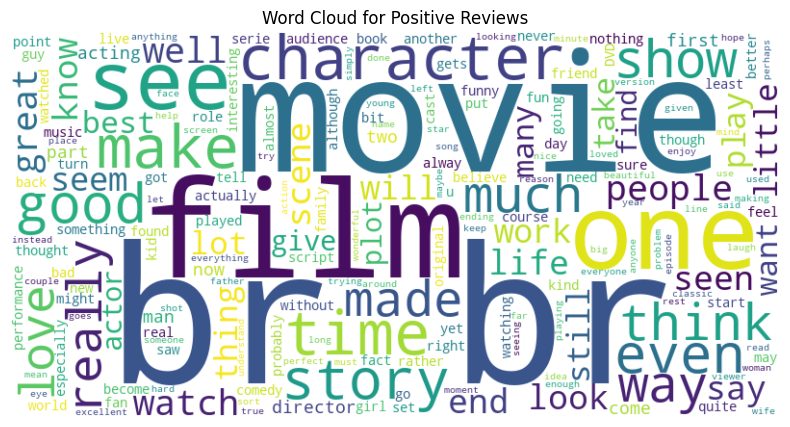

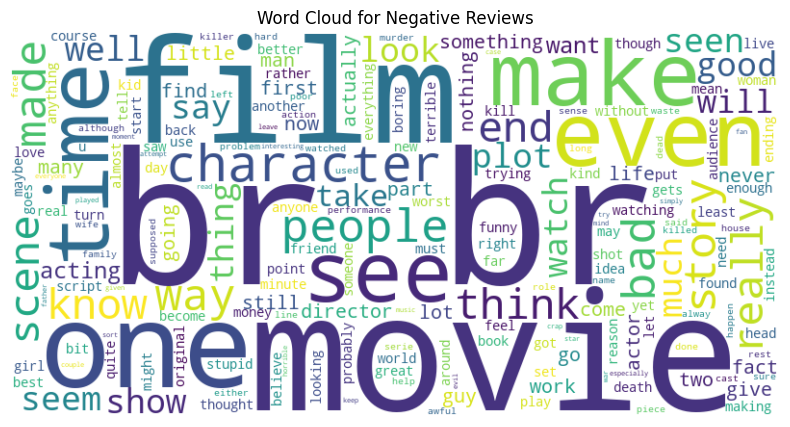

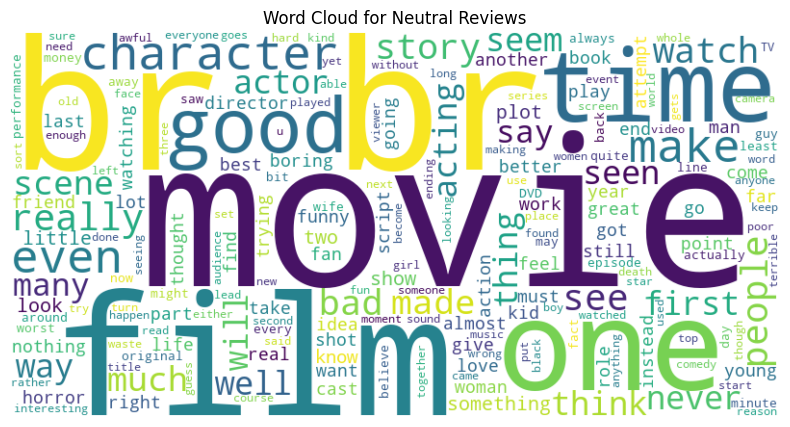

In [18]:
from wordcloud import WordCloud

for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(df[df['sentiment'] == sentiment]['review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()


###### Machine Learning Model Using Varder Sentiments

In [19]:

nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#initalizing
ps=PorterStemmer()

In [21]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-z]', ' ', df['cleaned'][i])
    review = review.lower()
    review = review.split()
    review = (ps.stem(word) for word in review if not word in stopwords.words('english'))
    review = ' '.join(review)
    corpus.append(review)
                    

In [22]:
corpus

['one review mention watch oz episod youll hook right exactli happen mebr br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordbr br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awaybr br would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz ma

In [23]:
X = df['review']
# Input text

y = df['sentiment']
# Target sentiment label

In [24]:
X

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [25]:
y.head()

0    Negative
1    Positive
2    Positive
3    Negative
4    Positive
Name: sentiment, dtype: object

###### Converting Text to Features
Using TfidfVectorizer to convert text to numerical format

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vect = vectorizer.fit_transform(X)

In [27]:
X_vect

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3510619 stored elements and shape (50000, 5000)>

###### Checking for imbalance in the target

In [28]:
df['sentiment'].value_counts(normalize=True) * 100  # Viewing as percentages


sentiment
Positive    66.172
Negative    33.138
Neutral      0.690
Name: proportion, dtype: float64

The dataset is not balanced

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [30]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [31]:
X_train.shape

(37500, 5000)

In [32]:
y_train.shape

(37500,)

In [33]:
y_test.shape

(12500,)

In [34]:
#Using Smote
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [35]:
y_resampled.value_counts()

sentiment
Positive    24770
Negative    24770
Neutral     24770
Name: count, dtype: int64

* The target variable is now balanced

#### Models Training

###### The Naive Bayes Model

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [37]:
#Initailizing
model_NB = MultinomialNB()
model_NB.fit(X_resampled, y_resampled)

MultinomialNB()

In [38]:
#making predictions
y_pred = model_NB.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.77432
Classification Report:               precision    recall  f1-score   support

    Negative       0.65      0.76      0.70      4109
     Neutral       0.03      0.08      0.04        75
    Positive       0.88      0.79      0.83      8316

    accuracy                           0.77     12500
   macro avg       0.52      0.54      0.52     12500
weighted avg       0.80      0.77      0.78     12500



##### Model Interpretability with LIME

In [39]:
import lime
from lime.lime_text import LimeTextExplainer

# Initialize the LimeTextExplainer
Explainer = LimeTextExplainer(class_names=['Positive', 'Negative', 'Neutral'])

# Function to predict probabilities
def predict_proba(texts):
    return model_NB.predict_proba(vectorizer.transform(texts))

# Get the number of samples (rows) in the dataset
num_samples = df.shape[0]

# Ensure idx is within the valid range (0 to num_samples-1)
idx = 0  

# Check if idx is valid
if idx < num_samples:
    # Explain the prediction for the text at the given index
    exp = Explainer.explain_instance(df['cleaned'].iloc[idx], predict_proba, num_features=10)
    
    # Generate HTML explanation
    html_exp = exp.as_html()

    # Modify the HTML style to change text color to white
    from IPython.display import HTML
    html_exp_modified = html_exp.replace('<body>', 
                                         '<body style="background-color:black; color:white; font-family:Arial, sans-serif;">')
    HTML(html_exp_modified)
else:
    print(f"Index {idx} is out of range. Please choose an index between 0 and {num_samples-1}.")


In [40]:
import lime
from lime.lime_text import LimeTextExplainer
from IPython.display import HTML

# Initialize the LimeTextExplainer
Explainer = LimeTextExplainer(class_names=['Positive', 'Negative', 'Neutral'])

# Function to predict probabilities
def predict_proba(texts):
    return model_NB.predict_proba(vectorizer.transform(texts))

# Get the number of samples (rows) in the dataset
num_samples = df.shape[0]

# Ensure idx is within the valid range (0 to num_samples-1)
idx = 0  # or any other valid index based on your logic

# Check if idx is valid
if idx < num_samples:
    # Explain the prediction for the text at the given index
    exp = Explainer.explain_instance(df['cleaned'].iloc[idx], predict_proba, num_features=10)
    
    # Generate HTML explanation
    html_exp = exp.as_html()

    # Modify the HTML style to change text color to white and background to black
    html_exp_modified = html_exp.replace('<body>', 
                                         '<body style="background-color:black; color:white; font-family:Arial, sans-serif;">')
    
    # Display the modified HTML in the notebook
    display(HTML(html_exp_modified))
else:
    print(f"Index {idx} is out of range. Please choose an index between 0 and {num_samples-1}.")


##### Using Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression model
logreg = LogisticRegression()

#Training the Logistic Regression classifier
logreg.fit(X_resampled, y_resampled)

#Predicting the sentiment labels for the test set
y_pred = logreg.predict(X_test)

Model's Evaluation

In [42]:
#Evaluating the model's performance
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.84264

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.82      0.79      4109
     Neutral       0.02      0.05      0.03        75
    Positive       0.91      0.86      0.89      8316

    accuracy                           0.84     12500
   macro avg       0.56      0.58      0.57     12500
weighted avg       0.85      0.84      0.85     12500



In [ ]:
# Save the trained SVM model
import joblib
joblib.dump(logreg, 'best_model_logreg.pkl')
#joblib.dump(vectorizer, 'vectorizer.pkl')

['best_model_logreg.pkl']